## Sales Prediction

### Importing Necessary Libaries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [2]:
df = pd.read_csv("Advertising.csv",index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Data Understanding and Preprocessing

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
continous_col = df.select_dtypes(include = "float64").columns

### Bivariate Analysis

<Axes: xlabel='TV', ylabel='Sales'>

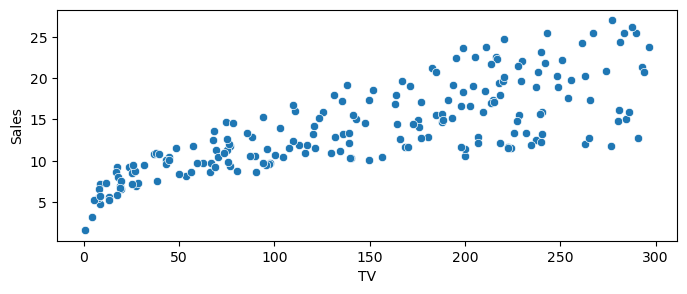

In [6]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df["TV"],y = df["Sales"],data = df)

Tv and Sales has a linear relationship

<Axes: xlabel='Radio', ylabel='Sales'>

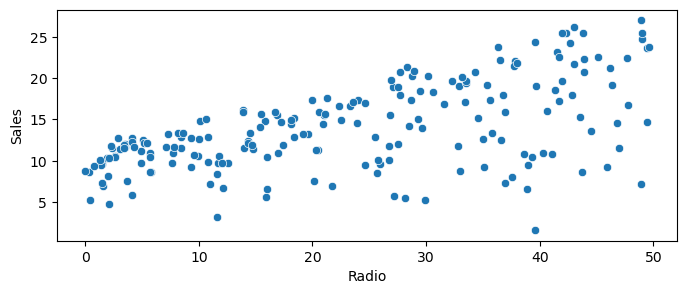

In [7]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df["Radio"],y = df["Sales"],data = df)

Radio and Sales has a Linear relationship

<Axes: xlabel='Newspaper', ylabel='Sales'>

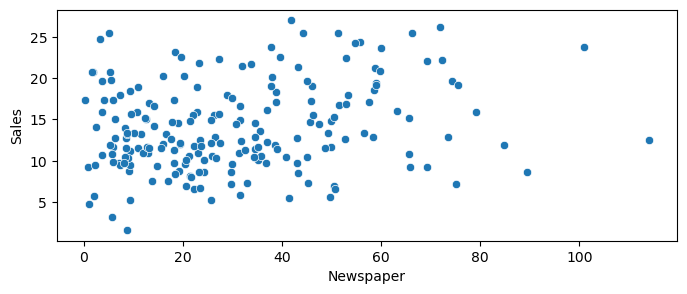

In [8]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df["Newspaper"],y = df["Sales"],data = df)

Here we can see that Radio and Tv have a positive relationship and Newspaper has no relation w.r.t to Sales

In [9]:
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending = False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


### Train Test Split

In [10]:
x = df.drop(columns = "Sales",axis = 1)
y = df["Sales"]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building

In [12]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

### Evaluation

In [13]:
y_pred = lr_model.predict(x_test)

In [14]:
r2_score(y_test,y_pred)

0.899438024100912

In [15]:
pd.DataFrame(index = x_test.index,
             data = {"Sales":y_test,
                    "prediction":np.round(y_pred,1)}).head(10)# model predictions

,Sales,prediction
96,16.9,16.4
16,22.4,20.9
31,21.4,21.6
159,7.3,10.6
129,24.7,22.1
116,12.6,13.1
70,22.3,21.1
171,8.4,7.5
175,11.5,13.6
46,14.9,15.2


In [16]:
Testing_Accuracy = np.round(r2_score(y_test,y_pred)*100,2)
print("Testing Accuracy :",Testing_Accuracy) 

Testing Accuracy : 89.94
